## Homework 2

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


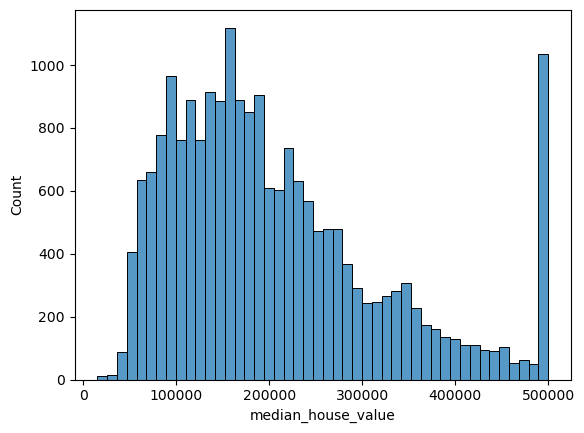

In [3]:
sns.histplot(data.median_house_value);

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [4]:
data = data[(data['ocean_proximity'] == '<1H OCEAN') | (data['ocean_proximity'] == 'INLAND')]
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
data = data[columns]
data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* **`total_bedrooms`**
* `population`
* `households`

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- **1195**
- 1295

In [6]:
data.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

### Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [7]:
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [8]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [9]:
data['median_house_value'] = np.log1p(data['median_house_value'])
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]
len(data_train), len(data_val), len(data_test)

(9413, 3137, 3137)

In [10]:
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [11]:
y_train = data_train.median_house_value.values
y_val = data_val.median_house_value.values
y_test = data_test.median_house_value.values

In [12]:
del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- **Both are equally good**

In [13]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [18]:
# Option 1 with 0
X_train = data_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred).round(2)

0.34

In [19]:
# Option 2 with mean
mean = data_train['total_bedrooms'].mean()
X_train = data_train.fillna(mean).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred).round(2)

0.34

In [21]:
# Option 1 with validation dataset
X_val = data_val.fillna(0).values
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

0.34

In [23]:
# Option 2 with validation dataset
X_val = data_val.fillna(mean).values
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

0.34

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- **0**
- 0.000001
- 0.001
- 0.0001

In [49]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [31]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = data_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = data_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred).round(2)
    
    print(r, w0, score)

0 -9.763249477643612 0.34
1e-06 -9.763228830981872 0.34
0.0001 -9.761185235503829 0.34
0.001 -9.742646249663796 0.34
0.01 -9.561056192952272 0.34
0.1 -8.058889768941656 0.34
1 -3.1331542784089006 0.34
5 -0.8410867974613108 0.35
10 -0.4381172315823193 0.35


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- **0.005**
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [33]:
idx = np.arange(n)
scores = [] 
for seed in range(10):
    # shuffle the data
    np.random.seed(seed)
    np.random.shuffle(idx)
    # create train/val/test datasets
    data_train = data.iloc[idx[:n_train]]
    data_val = data.iloc[idx[n_train:n_train+n_val]]
    data_test = data.iloc[idx[n_train+n_val:]]
    # reset indexes
    data_train = data_train.reset_index(drop=True)
    data_val = data_val.reset_index(drop=True)
    data_test = data_test.reset_index(drop=True)
    # create target values
    y_train = data_train.median_house_value.values
    y_val = data_val.median_house_value.values
    y_test = data_test.median_house_value.values
    # drop target feature from the data set
    del data_train['median_house_value']
    del data_val['median_house_value']
    del data_test['median_house_value']
    # train with fillna(0) and no regularization
    X_train = data_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    # evaluate the model with val dataset
    X_val = data_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)

np.std(scores).round(3)

0.006

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- **0.33**
- 0.43

In [50]:
# shuffle the data
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
# create train/val/test datasets
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]

# reset indexes
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)
# create target values
y_train = data_train.median_house_value.values
y_val = data_val.median_house_value.values
y_test = data_test.median_house_value.values
# drop target feature from the data set
del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']
# combine train and validation datasets
data_full_train = pd.concat([data_train, data_val])
data_full_train = data_full_train.fillna(0).values
y_full_train = np.concatenate([y_train, y_val])
# train the model
w0, w = train_linear_regression_reg(data_full_train, y_full_train, r=0.001)
# evaluate on the test dataset
data_test = data_test.fillna(0).values
y_pred = w0 + data_test.dot(w)
score = rmse(y_test, y_pred).round(2)
score

0.33

## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.